# Lecture 3: Present Value Relations II — Leverage, Inflation, and Extensions

## MIT 15.401 — Finance Theory I (Prof. Andrew Lo)

---

**Video:** [MIT OCW — Part II & III of Present Value Relations](https://ocw.mit.edu/courses/15-401-finance-theory-i-fall-2008/pages/video-lectures-and-slides/present-value-relations/)

**Readings:** Brealey, Myers, and Allen — Chapters 2–3

---

This notebook covers **Session 3**, which concludes the Present Value Relations block. Lo uses this lecture to build on the machinery developed in Session 2 with richer examples, and then introduces two critical real-world extensions: **leverage** and **inflation**.

The leverage discussion — using the unfolding collapse of Lehman Brothers as a case study (the course was taught in Fall 2008, with Lehman filing for bankruptcy *during* the semester) — is one of the most memorable segments of the course. It demonstrates how the balance sheet identity and simple arithmetic can reveal the fragility of highly leveraged financial institutions.

The inflation section completes the PV toolkit by distinguishing **nominal** from **real** cash flows and discount rates, and showing that PV calculations must treat inflation consistently.

## Table of Contents

1. [Review and Extended NPV Examples](#1-npv-examples)
2. [The Growing Annuity](#2-growing-annuity)
3. [Leverage — The Lehman Brothers Case Study](#3-leverage)
4. [Inflation and Real vs. Nominal Values](#4-inflation)
5. [Extensions and Qualifications](#5-extensions)
6. [Exercises](#6-exercises)

In [3]:
# ============================================================
# Setup
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from IPython.display import display, Markdown

plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 12,
    'lines.linewidth': 2,
})

# PV toolkit from Session 2 (reusable)
def compute_npv(cashflows, rate):
    return sum(cf / (1 + rate)**t for t, cf in enumerate(cashflows))

def pv_perpetuity(C, r):
    return C / r

def pv_growing_perpetuity(C, r, g):
    return C / (r - g) if r > g else float('inf')

def annuity_discount_factor(r, T):
    return (1 - (1 + r)**(-T)) / r if r != 0 else T

def pv_annuity(C, r, T):
    return C * annuity_discount_factor(r, T)

def fv_annuity(C, r, T):
    return C * ((1 + r)**T - 1) / r if r != 0 else C * T

def pv_growing_annuity(C, r, g, T):
    if abs(r - g) < 1e-10:
        return C * T / (1 + r)
    return C * (1 - ((1 + g) / (1 + r))**T) / (r - g)

print("Libraries and PV toolkit loaded.")

Libraries and PV toolkit loaded.


---

<a id='1-npv-examples'></a>
## 1. Review and Extended NPV Examples

### Example 1: Boeing Regional Jet (from Lo's slides)

Boeing is evaluating a new regional jet program:
- **Development:** 3 years, costing \$850 million total
- **Unit cost:** \$33 million per plane
- **Sales forecast:** 30 planes per year at \$41 million each
- **Production horizon:** After development, production runs for 20 years

We need to lay out the cash flows and compute the NPV at a given cost of capital. This is a realistic corporate capital budgeting problem.

BOEING REGIONAL JET — NPV ANALYSIS
Development cost:     $850M over 3 years
Production margin:    $8M/plane × 30 planes = $240M/year
Production horizon:   20 years (years 4–23)
Cost of capital:      8%
-----------------------------------------------------------------
PV of development:    $    -730.2M
PV of production:     $   1,870.6M
NPV:                  $   1,140.4M

Decision: ✅ PROCEED


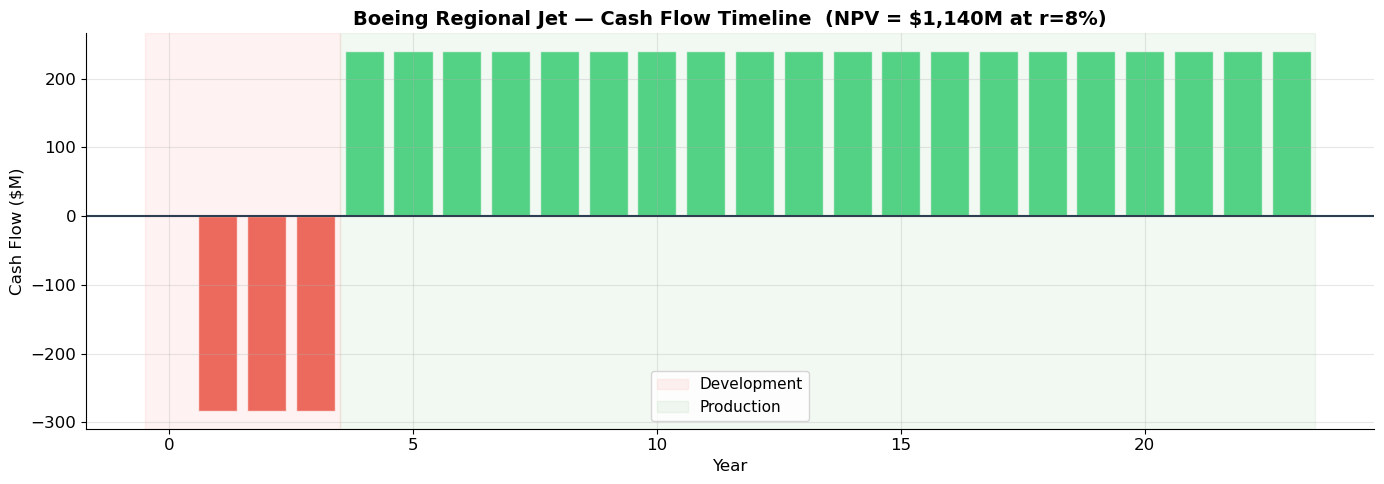

In [5]:
# ============================================================
# Example 1: Boeing Regional Jet — NPV Analysis
# ============================================================
# ▶ MODIFY PARAMETERS AND RE-RUN
cost_of_capital = 0.08
dev_cost_annual = 850 / 3        # $M per year for 3 years
units_per_year = 30
price_per_unit = 41              # $M
cost_per_unit = 33               # $M
dev_years = 3
production_years = 20
# ============================================================

margin_per_unit = price_per_unit - cost_per_unit  # $8M per plane
annual_profit = units_per_year * margin_per_unit   # $240M per year

# Cash flows: years 1-3 = development cost; years 4-23 = production profit
cashflows = [0]  # t=0
for t in range(1, dev_years + 1):
    cashflows.append(-dev_cost_annual)
for t in range(dev_years + 1, dev_years + production_years + 1):
    cashflows.append(annual_profit)

npv = compute_npv(cashflows, cost_of_capital)

# Decomposition
pv_development = sum(-dev_cost_annual / (1 + cost_of_capital)**t for t in range(1, dev_years + 1))
pv_production = sum(annual_profit / (1 + cost_of_capital)**t for t in range(dev_years + 1, dev_years + production_years + 1))

print("=" * 65)
print("BOEING REGIONAL JET — NPV ANALYSIS")
print("=" * 65)
print(f"Development cost:     ${850:,.0f}M over {dev_years} years")
print(f"Production margin:    ${margin_per_unit:,.0f}M/plane × {units_per_year} planes = ${annual_profit:,.0f}M/year")
print(f"Production horizon:   {production_years} years (years {dev_years+1}–{dev_years+production_years})")
print(f"Cost of capital:      {cost_of_capital:.0%}")
print("-" * 65)
print(f"PV of development:    ${pv_development:>10,.1f}M")
print(f"PV of production:     ${pv_production:>10,.1f}M")
print(f"NPV:                  ${npv:>10,.1f}M")
print(f"\nDecision: {'✅ PROCEED' if npv > 0 else '❌ DO NOT PROCEED'}")

# Visualize
fig, ax = plt.subplots(figsize=(14, 5))
years = range(len(cashflows))
colors = ['#e74c3c' if cf < 0 else '#2ecc71' for cf in cashflows]
ax.bar(years, cashflows, color=colors, alpha=0.8, edgecolor='white')
ax.axhline(y=0, color='#2c3e50', linewidth=1.5)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Cash Flow ($M)', fontsize=12)
ax.set_title(f'Boeing Regional Jet — Cash Flow Timeline  (NPV = ${npv:,.0f}M at r={cost_of_capital:.0%})',
             fontsize=14, fontweight='bold')
ax.axvspan(-0.5, dev_years + 0.5, alpha=0.05, color='red', label='Development')
ax.axvspan(dev_years + 0.5, dev_years + production_years + 0.5, alpha=0.05, color='green', label='Production')
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

### Example 2: Lo's Subsidized Loan (CNOOC/Unocal)

From the lecture: CNOOC bid 67USD /share for Unocal, receiving \$7 billion in cheap loans from its parent company:
- **Loan 1:** \$2.5 billion at 0% interest for 2 years (market rate: 8%)
- **Loan 2:** \$4.5 billion at 3.5% for 30 years (market rate: 8%)

The interest subsidy can be valued as an annuity of interest savings.

In [7]:
# ============================================================
# Example 2: Valuing a Subsidized Loan (CNOOC/Unocal)
# ============================================================
market_rate = 0.08

# Loan 1: $2.5B at 0% for 2 years
loan1 = 2.5  # $B
rate1 = 0.00
term1 = 2
savings1 = loan1 * (market_rate - rate1)  # annual savings
pv_savings1 = pv_annuity(savings1, market_rate, term1)

# Loan 2: $4.5B at 3.5% for 30 years
loan2 = 4.5
rate2 = 0.035
term2 = 30
savings2 = loan2 * (market_rate - rate2)  # annual savings
pv_savings2 = pv_annuity(savings2, market_rate, term2)

total_subsidy = pv_savings1 + pv_savings2

print("=" * 60)
print("CNOOC INTEREST SUBSIDY VALUATION")
print("=" * 60)
print(f"{'':30s} {'Loan 1':>12s} {'Loan 2':>12s}")
print("-" * 60)
print(f"{'Principal':30s} {'$'+f'{loan1:.1f}B':>12s} {'$'+f'{loan2:.1f}B':>12s}")
print(f"{'Subsidized rate':30s} {rate1:>12.1%} {rate2:>12.1%}")
print(f"{'Market rate':30s} {market_rate:>12.1%} {market_rate:>12.1%}")
print(f"{'Term':30s} {term1:>9d} yrs {term2:>9d} yrs")
print(f"{'Annual interest savings':30s} {'$'+f'{savings1:.2f}B':>12s} {'$'+f'{savings2:.3f}B':>12s}")
print(f"{'PV of savings':30s} {'$'+f'{pv_savings1:.3f}B':>12s} {'$'+f'{pv_savings2:.3f}B':>12s}")
print("-" * 60)
print(f"{'TOTAL SUBSIDY VALUE':30s} {'$'+f'{total_subsidy:.3f}B':>12s}")
print(f"\n→ The cheap financing is worth ${total_subsidy:.2f} billion to CNOOC.")
print(f"  This is a hidden {total_subsidy/(67 * 1.8) * 100:.1f}% premium on the offer price.")

CNOOC INTEREST SUBSIDY VALUATION
                                     Loan 1       Loan 2
------------------------------------------------------------
Principal                             $2.5B        $4.5B
Subsidized rate                        0.0%         3.5%
Market rate                            8.0%         8.0%
Term                                   2 yrs        30 yrs
Annual interest savings              $0.20B      $0.202B
PV of savings                       $0.357B      $2.280B
------------------------------------------------------------
TOTAL SUBSIDY VALUE                 $2.636B

→ The cheap financing is worth $2.64 billion to CNOOC.
  This is a hidden 2.2% premium on the offer price.


---

<a id='2-growing-annuity'></a>
## 2. The Growing Annuity

We've seen the perpetuity, growing perpetuity, and annuity. The last member of the family is the **growing annuity**: a cash flow that starts at $C$, grows at rate $g$ per period, and lasts for $T$ periods.

$$\text{Cash flows: } C, \; C(1+g), \; C(1+g)^2, \; \ldots, \; C(1+g)^{T-1}$$

The present value is:

$$\boxed{PV_{\text{growing annuity}} = \frac{C}{r - g}\left[1 - \left(\frac{1+g}{1+r}\right)^T\right] \qquad \text{for } r \neq g}$$

For the special case $r = g$:

$$PV = \frac{C \cdot T}{1 + r}$$

### The Complete Family of Special Cash Flows

| Cash Flow | Duration | Growth | Formula |
|-----------|----------|--------|---------|
| Perpetuity | $\infty$ | 0 | $C/r$ |
| Growing Perpetuity | $\infty$ | $g$ | $C/(r-g)$ |
| Annuity | $T$ | 0 | $C \cdot [1-(1+r)^{-T}]/r$ |
| **Growing Annuity** | $T$ | $g$ | $C/(r-g) \cdot [1-((1+g)/(1+r))^T]$ |

Note the logical relationships: setting $g=0$ in the growing annuity gives the annuity; setting $T=\infty$ in the growing annuity gives the growing perpetuity; setting both $g=0$ and $T=\infty$ gives the basic perpetuity.

### Application: Valuing a Career

This is the natural tool for valuing **lifetime earnings** — a salary that grows with inflation and promotions over a finite career.

In [9]:
# ============================================================
# Lo's Salary Example — Growing Annuity
# ============================================================
# From slide 33: You earn $100,000 this year, expect 2% real growth
# for 20 more years. Interest rate = 5%, inflation = 2%.

# ▶ MODIFY AND RE-RUN
current_salary = 100_000
real_growth = 0.02
nominal_rate = 0.05
inflation = 0.02
career_years = 20
# ============================================================

# Method 1: Real cash flows discounted at real rate
real_rate = (1 + nominal_rate) / (1 + inflation) - 1
first_real_cf = current_salary * (1 + real_growth)  # next year's salary in real terms

pv_real = pv_growing_annuity(first_real_cf, real_rate, real_growth, career_years)

# Method 2: Nominal cash flows discounted at nominal rate
nominal_growth = (1 + real_growth) * (1 + inflation) - 1
first_nominal_cf = current_salary * (1 + nominal_growth)

pv_nominal = pv_growing_annuity(first_nominal_cf, nominal_rate, nominal_growth, career_years)

print("=" * 60)
print("CAREER VALUATION — Lo's Salary Example")
print("=" * 60)
print(f"Current salary:          ${current_salary:>12,.0f}")
print(f"Real salary growth:      {real_growth:>12.2%}")
print(f"Inflation:               {inflation:>12.2%}")
print(f"Nominal interest rate:   {nominal_rate:>12.2%}")
print(f"Real interest rate:      {real_rate:>12.4%}")
print(f"Career horizon:          {career_years:>9d} years")
print("-" * 60)
print(f"\nMethod 1 — Real CFs at real rate:")
print(f"  First real CF:   ${first_real_cf:>12,.0f}")
print(f"  PV (real):       ${pv_real:>12,.0f}")
print(f"\nMethod 2 — Nominal CFs at nominal rate:")
print(f"  First nominal CF:${first_nominal_cf:>12,.0f}")
print(f"  PV (nominal):    ${pv_nominal:>12,.0f}")
print(f"\n→ Both methods give the same answer: ${pv_real:,.0f}")
print(f"  (Difference due to rounding: ${abs(pv_real - pv_nominal):,.2f})")

CAREER VALUATION — Lo's Salary Example
Current salary:          $     100,000
Real salary growth:             2.00%
Inflation:                      2.00%
Nominal interest rate:          5.00%
Real interest rate:           2.9412%
Career horizon:                 20 years
------------------------------------------------------------

Method 1 — Real CFs at real rate:
  First real CF:   $     102,000
  PV (real):       $   1,818,674

Method 2 — Nominal CFs at nominal rate:
  First nominal CF:$     104,040
  PV (nominal):    $   1,818,674

→ Both methods give the same answer: $1,818,674
  (Difference due to rounding: $0.00)


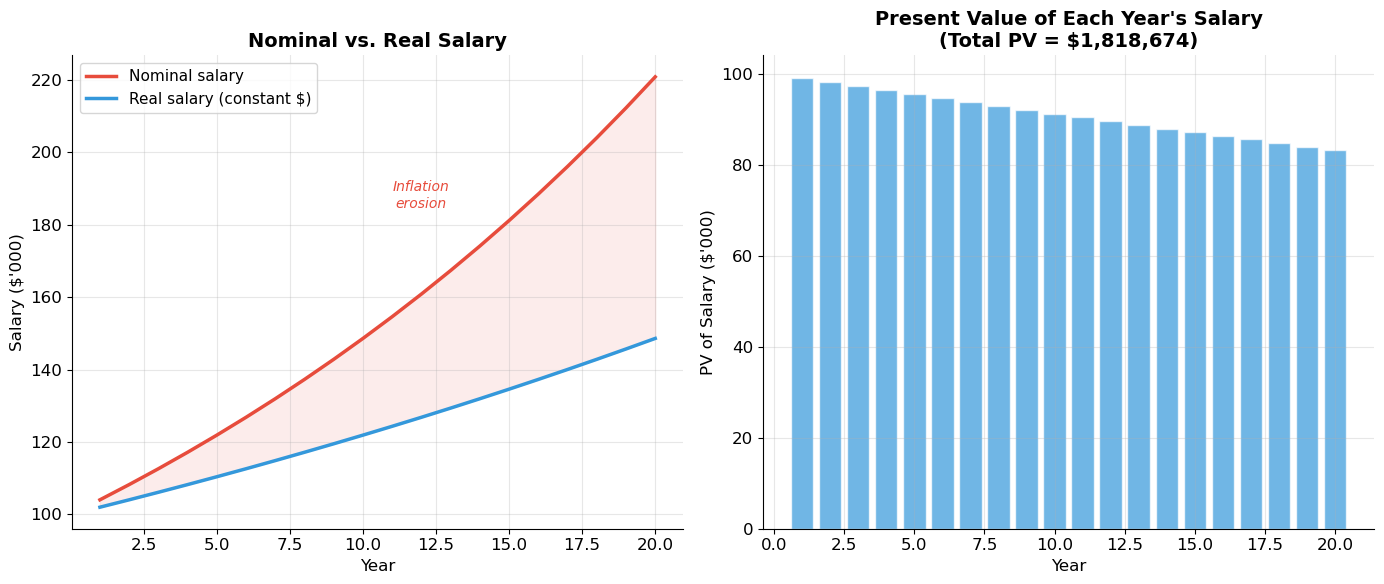

In [10]:
# ============================================================
# Visualization: Growing Annuity — Cash Flow Stream Over Time
# ============================================================
years = np.arange(1, career_years + 1)

# Real cash flows
real_cfs = current_salary * (1 + real_growth) ** years
nominal_cfs = current_salary * (1 + nominal_growth) ** years
real_dcfs = real_cfs / (1 + nominal_rate) ** years  # PV of each nominal CF

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Nominal vs Real salary over time
ax1.plot(years, nominal_cfs / 1000, color='#e74c3c', linewidth=2.5, label='Nominal salary')
ax1.plot(years, real_cfs / 1000, color='#3498db', linewidth=2.5, label='Real salary (constant $)')
ax1.fill_between(years, real_cfs / 1000, nominal_cfs / 1000, alpha=0.1, color='#e74c3c')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel("Salary ($'000)", fontsize=12)
ax1.set_title('Nominal vs. Real Salary', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.text(career_years * 0.6, (nominal_cfs[-1] + real_cfs[-1]) / 2 / 1000,
         'Inflation\nerosion', fontsize=10, color='#e74c3c', style='italic', ha='center')

# Right: Discounted cash flows
ax2.bar(years, nominal_cfs / (1 + nominal_rate)**years / 1000, color='#3498db', alpha=0.7, edgecolor='white')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel("PV of Salary ($'000)", fontsize=12)
ax2.set_title(f'Present Value of Each Year\'s Salary\n(Total PV = ${pv_real:,.0f})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

<a id='3-leverage'></a>
## 3. Leverage — The Lehman Brothers Case Study

This is one of the most powerful segments of Lo's course. In Fall 2008, Lehman Brothers collapsed *during the semester*, and Lo used it as a live case study to illustrate the power and danger of **leverage**.

### What Is Leverage?

Leverage means using **borrowed money** to amplify returns. It follows directly from the balance sheet identity:

$$\text{Assets} = \text{Liabilities} + \text{Equity}$$

The **leverage ratio** is:

$$\text{Leverage Ratio} = \frac{\text{Total Assets}}{\text{Equity}}$$

If a firm has \$100 in assets and \$5 in equity (and \$95 in debt), its leverage ratio is 20:1.

### The Amplification Effect

Leverage amplifies both gains **and** losses. If assets increase by 10%:

$$\text{Return on Equity} = \text{Leverage Ratio} \times \text{Return on Assets}$$

With 20:1 leverage, a 10% asset gain produces a **200% return on equity**. But a 5% asset *loss* wipes out **100% of equity**.

### Lo's Personal Example

Lo described buying a house: purchase price \$500,000, down payment \$25,000 (5%), mortgage \$475,000. That's **20:1 leverage** — higher than Lehman Brothers! But Lo argued it wasn't insane because housing price volatility was historically very low.

### The Critical Insight

With leverage ratio $L$, the firm is wiped out if assets decline by just $1/L$:

$$\text{Maximum tolerable loss} = \frac{\text{Equity}}{\text{Assets}} = \frac{1}{L}$$

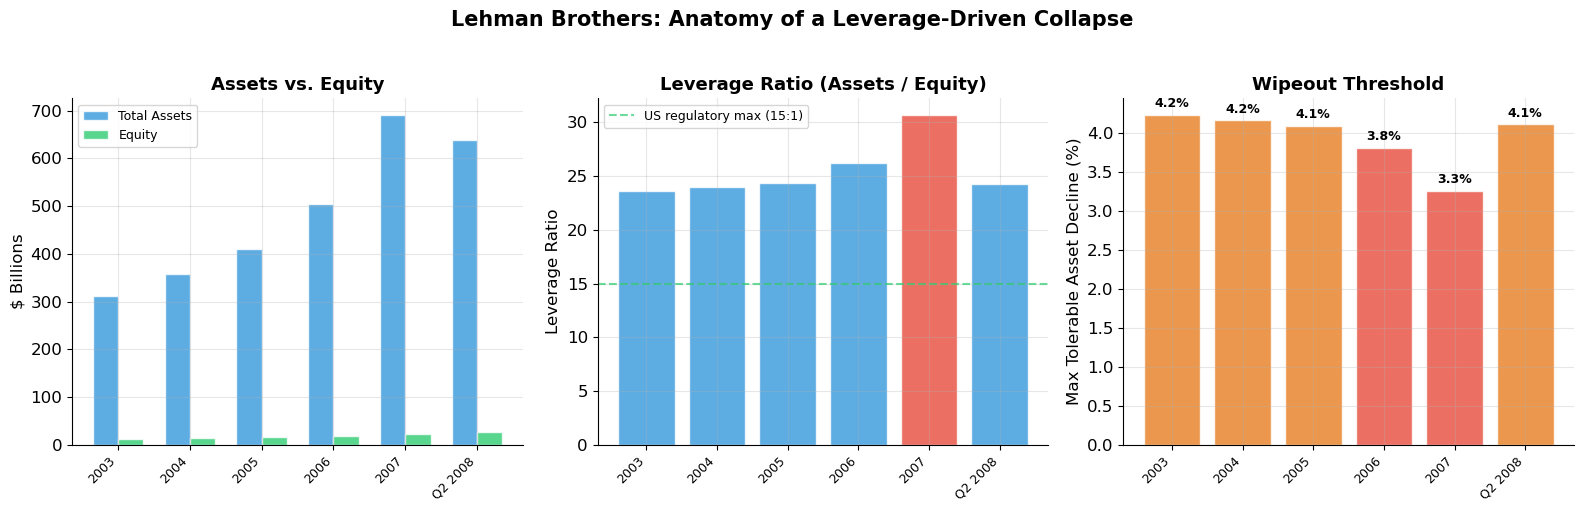

Lehman Brothers Key Metrics:
      Year  Assets ($B)  Equity ($B)   Leverage  Wipeout %
----------------------------------------------------------------------
      2003        312.0         13.2       23.6x       4.2%
      2004        358.0         14.9       24.0x       4.2%
      2005        410.0         16.8       24.4x       4.1%
      2006        504.0         19.2       26.2x       3.8%
      2007        691.0         22.5       30.7x       3.3%
   Q2 2008        639.0         26.3       24.3x       4.1%


In [12]:
# ============================================================
# Lehman Brothers Balance Sheet and Leverage Analysis
# ============================================================

# Lehman Brothers data (approximate, from 10-K and Lo's lecture)
lehman_data = {
    '2003': {'assets': 312, 'equity': 13.2, 'leverage': 23.6},
    '2004': {'assets': 358, 'equity': 14.9, 'leverage': 24.0},
    '2005': {'assets': 410, 'equity': 16.8, 'leverage': 24.4},
    '2006': {'assets': 504, 'equity': 19.2, 'leverage': 26.2},
    '2007': {'assets': 691, 'equity': 22.5, 'leverage': 30.7},
    'Q2 2008': {'assets': 639, 'equity': 26.3, 'leverage': 24.3},
}

years = list(lehman_data.keys())
assets = [d['assets'] for d in lehman_data.values()]
equity = [d['equity'] for d in lehman_data.values()]
leverage = [d['leverage'] for d in lehman_data.values()]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Assets vs Equity
ax = axes[0]
x = np.arange(len(years))
width = 0.35
ax.bar(x - width/2, assets, width, color='#3498db', alpha=0.8, label='Total Assets', edgecolor='white')
ax.bar(x + width/2, equity, width, color='#2ecc71', alpha=0.8, label='Equity', edgecolor='white')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=9)
ax.set_ylabel('$ Billions')
ax.set_title('Assets vs. Equity', fontsize=13, fontweight='bold')
ax.legend(fontsize=9)

# Leverage ratio
ax = axes[1]
colors = ['#3498db' if l < 28 else '#e67e22' if l < 30 else '#e74c3c' for l in leverage]
ax.bar(x, leverage, color=colors, alpha=0.8, edgecolor='white')
ax.axhline(y=15, color='#2ecc71', linewidth=1.5, linestyle='--', alpha=0.7, label='US regulatory max (15:1)')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=9)
ax.set_ylabel('Leverage Ratio')
ax.set_title('Leverage Ratio (Assets / Equity)', fontsize=13, fontweight='bold')
ax.legend(fontsize=9)

# Maximum tolerable loss
ax = axes[2]
max_loss = [1/l * 100 for l in leverage]
ax.bar(x, max_loss, color=['#e74c3c' if ml < 4 else '#e67e22' for ml in max_loss],
       alpha=0.8, edgecolor='white')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=9)
ax.set_ylabel('Max Tolerable Asset Decline (%)')
ax.set_title('Wipeout Threshold', fontsize=13, fontweight='bold')
for i, ml in enumerate(max_loss):
    ax.text(i, ml + 0.1, f'{ml:.1f}%', ha='center', fontsize=9, fontweight='bold')

fig.suptitle('Lehman Brothers: Anatomy of a Leverage-Driven Collapse', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Lehman Brothers Key Metrics:")
print("=" * 70)
print(f"{'Year':>10s} {'Assets ($B)':>12s} {'Equity ($B)':>12s} {'Leverage':>10s} {'Wipeout %':>10s}")
print("-" * 70)
for yr, d in lehman_data.items():
    print(f"{yr:>10s} {d['assets']:>12,.1f} {d['equity']:>12,.1f} {d['leverage']:>10.1f}x {1/d['leverage']*100:>9.1f}%")

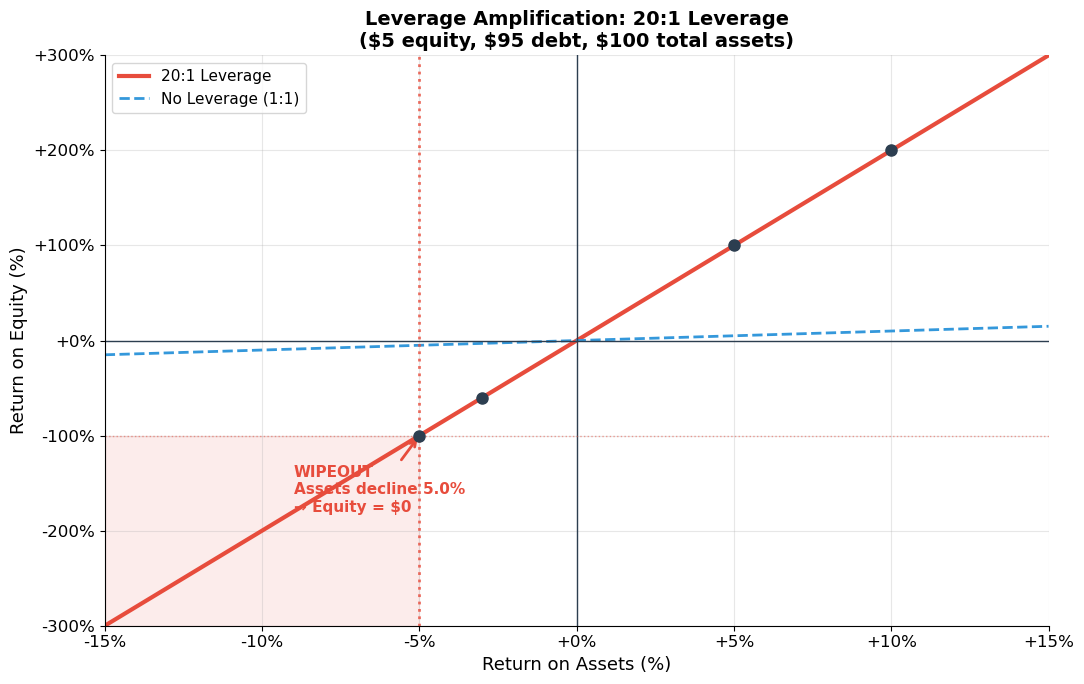

Leverage Ratio: 20:1
A 5.0% decline in assets wipes out ALL equity.
A 10% asset gain → 200% return on equity.
A 10% asset loss → -200% return on equity (beyond wipeout!).


In [13]:
# ============================================================
# Interactive: How Leverage Amplifies Returns
# ============================================================
# ▶ MODIFY AND RE-RUN
initial_assets = 100     # $100 in assets
equity_pct = 0.05        # 5% equity ($5), rest is debt
# ============================================================

equity = initial_assets * equity_pct
debt = initial_assets * (1 - equity_pct)
leverage_ratio = initial_assets / equity

asset_returns = np.linspace(-0.15, 0.15, 300)
equity_returns = leverage_ratio * asset_returns

fig, ax = plt.subplots(figsize=(11, 7))

# Plot equity return vs asset return
ax.plot(asset_returns * 100, equity_returns * 100, color='#e74c3c', linewidth=3, label=f'{leverage_ratio:.0f}:1 Leverage')
ax.plot(asset_returns * 100, asset_returns * 100, color='#3498db', linewidth=2, linestyle='--', label='No Leverage (1:1)')
ax.axhline(y=0, color='#2c3e50', linewidth=1)
ax.axvline(x=0, color='#2c3e50', linewidth=1)

# Wipeout zone
wipeout = 1 / leverage_ratio
ax.axvline(x=-wipeout * 100, color='#e74c3c', linewidth=2, linestyle=':', alpha=0.8)
ax.axhline(y=-100, color='#e74c3c', linewidth=1, linestyle=':', alpha=0.5)
ax.fill_betweenx([-300, -100], -15, -wipeout * 100, alpha=0.1, color='#e74c3c')
ax.annotate(f'WIPEOUT\nAssets decline {wipeout:.1%}\n→ Equity = $0',
            xy=(-wipeout * 100, -100), xytext=(-wipeout * 100 - 4, -180),
            fontsize=11, fontweight='bold', color='#e74c3c',
            arrowprops=dict(arrowstyle='->', color='#e74c3c', lw=2))

# Example points
for ar in [0.05, 0.10, -0.03, -wipeout]:
    er = leverage_ratio * ar
    marker = 'o' if er > -100 else 'X'
    ax.plot(ar * 100, min(er, 0) * 100 if er < 0 else er * 100, marker, color='#2c3e50', markersize=8, zorder=5)
    if abs(er) < 3:
        continue
    label = f'{ar:+.0%} → {min(er, -1):+.0%}' if er <= -1 else f'{ar:+.0%} → {er:+.0%}'
    ax.annotate(label, xy=(ar * 100, er * 100), xytext=(ar * 100 + 1.5, er * 100),
                fontsize=9, color='#2c3e50')

ax.set_xlabel('Return on Assets (%)', fontsize=13)
ax.set_ylabel('Return on Equity (%)', fontsize=13)
ax.set_title(f'Leverage Amplification: {leverage_ratio:.0f}:1 Leverage\n'
             f'(${equity:.0f} equity, ${debt:.0f} debt, ${initial_assets:.0f} total assets)',
             fontsize=14, fontweight='bold')
ax.set_ylim(-300, 300)
ax.set_xlim(-15, 15)
ax.legend(fontsize=11, loc='upper left')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:+.0f}%'))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:+.0f}%'))

plt.tight_layout()
plt.show()

print(f"Leverage Ratio: {leverage_ratio:.0f}:1")
print(f"A {wipeout:.1%} decline in assets wipes out ALL equity.")
print(f"A 10% asset gain → {leverage_ratio * 0.10:.0%} return on equity.")
print(f"A 10% asset loss → {leverage_ratio * -0.10:.0%} return on equity (beyond wipeout!).")

### The Lehman Lesson

Lo's key points about Lehman:

1. **Leverage ratio of ~31:1 in 2007.** A mere 3.3% decline in asset values would wipe out *all* of Lehman's equity. Housing-related assets comprised over \$100 billion — more than 4× equity.

2. **Leverage is not inherently bad** — it depends on the **volatility** of the underlying assets. Lo's 20:1 mortgage was fine because housing prices had very low volatility. Lehman's 30:1 leverage on *volatile, illiquid* assets was catastrophic.

3. **The Balance Sheet Identity is inescapable:** $A = L + E$. If $A$ falls by more than $E$, the firm is insolvent — no financial engineering can change this arithmetic.

4. **Lehman filed for Chapter 11 on September 15, 2008** — the largest bankruptcy in US history (\$639 billion in assets). It triggered a global financial panic.

---

<a id='4-inflation'></a>
## 4. Inflation and Real vs. Nominal Values

### What Is Inflation?

Inflation is the change in the **real purchasing power** of money over time. It is conceptually *distinct* from the time value of money (though both reduce the value of future dollars).

Given a price index $I_t$, the inflation rate over $k$ periods is:

$$\frac{I_{t+k}}{I_t} = (1 + \pi)^k$$

where $\pi$ is the per-period inflation rate.

**Real wealth** adjusts for purchasing power:

$$\tilde{W}_{t+k} = \frac{W_{t+k}}{(1 + \pi)^k}$$

### The Fisher Equation

The relationship between nominal and real interest rates:

$$(1 + r_{\text{nominal}}) = (1 + r_{\text{real}}) \times (1 + \pi)$$

$$\boxed{r_{\text{real}} = \frac{1 + r_{\text{nominal}}}{1 + \pi} - 1 \approx r_{\text{nominal}} - \pi}$$

The approximation $r_{\text{real}} \approx r_{\text{nominal}} - \pi$ works well when inflation is low, but becomes inaccurate at high inflation rates.

### The Golden Rule of Inflation in NPV

$$\boxed{\text{Discount REAL cash flows with REAL rates. Discount NOMINAL cash flows with NOMINAL rates.}}$$

**Never mix nominal cash flows with real discount rates or vice versa.** Both methods give the same answer when applied consistently.

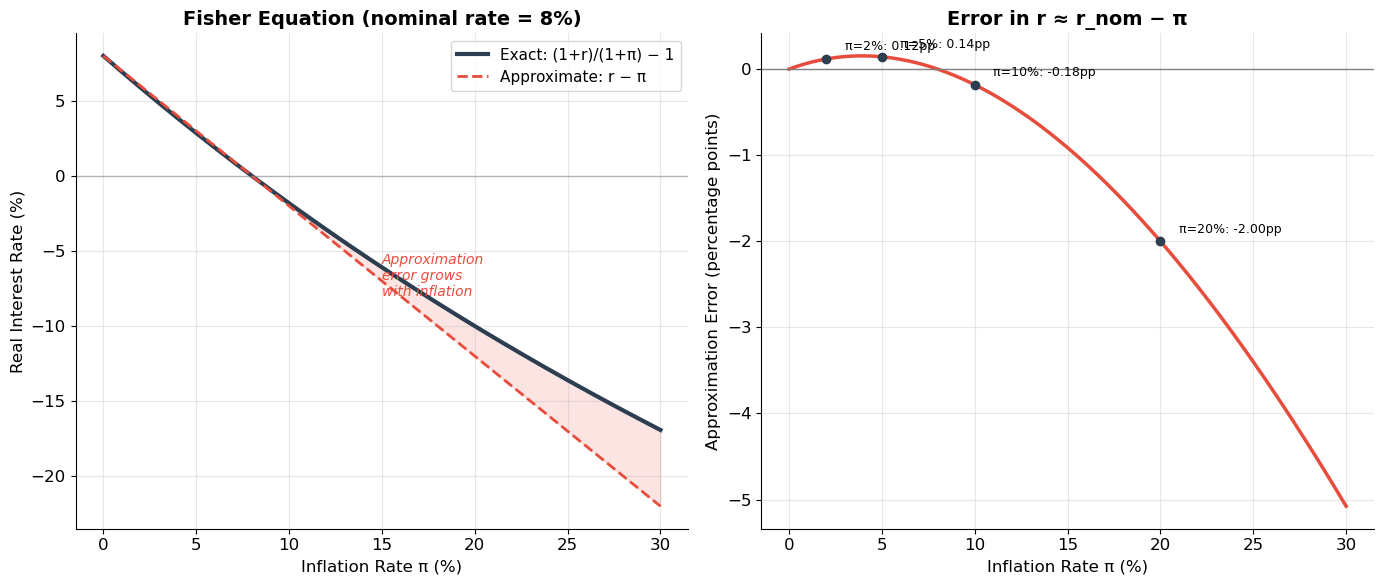

Fisher Equation Comparison:
 Inflation   Exact Real  Approx Real    Error
---------------------------------------------
        1%      6.9307%      7.0000%   0.069pp
        2%      5.8824%      6.0000%   0.118pp
        3%      4.8544%      5.0000%   0.146pp
        5%      2.8571%      3.0000%   0.143pp
        8%      0.0000%      0.0000%   0.000pp
       10%     -1.8182%     -2.0000%  -0.182pp
       15%     -6.0870%     -7.0000%  -0.913pp
       20%    -10.0000%    -12.0000%  -2.000pp
       50%    -28.0000%    -42.0000% -14.000pp


In [16]:
# ============================================================
# The Fisher Equation: Exact vs. Approximate
# ============================================================
inflation_range = np.linspace(0, 0.30, 300)
nominal_rate = 0.08

real_exact = (1 + nominal_rate) / (1 + inflation_range) - 1
real_approx = nominal_rate - inflation_range

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Real rate vs. inflation
ax1.plot(inflation_range * 100, real_exact * 100, color='#2c3e50', linewidth=3, label='Exact: (1+r)/(1+π) − 1')
ax1.plot(inflation_range * 100, real_approx * 100, color='#e74c3c', linewidth=2, linestyle='--', label='Approximate: r − π')
ax1.axhline(y=0, color='gray', linewidth=1, alpha=0.5)
ax1.fill_between(inflation_range * 100, real_exact * 100, real_approx * 100, alpha=0.15, color='#e74c3c')
ax1.set_xlabel('Inflation Rate π (%)', fontsize=12)
ax1.set_ylabel('Real Interest Rate (%)', fontsize=12)
ax1.set_title(f'Fisher Equation (nominal rate = {nominal_rate:.0%})', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.text(15, -8, 'Approximation\nerror grows\nwith inflation', fontsize=10, color='#e74c3c', style='italic')

# Right: Approximation error
error = (real_approx - real_exact) * 100
ax2.plot(inflation_range * 100, error, color='#e74c3c', linewidth=2.5)
ax2.axhline(y=0, color='gray', linewidth=1)
ax2.set_xlabel('Inflation Rate π (%)', fontsize=12)
ax2.set_ylabel('Approximation Error (percentage points)', fontsize=12)
ax2.set_title('Error in r ≈ r_nom − π', fontsize=14, fontweight='bold')

# Mark useful reference points
for pi in [0.02, 0.05, 0.10, 0.20]:
    err = (nominal_rate - pi) - ((1 + nominal_rate) / (1 + pi) - 1)
    ax2.plot(pi * 100, err * 100, 'o', color='#2c3e50', markersize=6, zorder=5)
    ax2.annotate(f'π={pi:.0%}: {err*100:.2f}pp', xy=(pi*100, err*100),
                xytext=(pi*100 + 1, err*100 + 0.1), fontsize=9)

plt.tight_layout()
plt.show()

print("Fisher Equation Comparison:")
print(f"{'Inflation':>10s} {'Exact Real':>12s} {'Approx Real':>12s} {'Error':>8s}")
print("-" * 45)
for pi in [0.01, 0.02, 0.03, 0.05, 0.08, 0.10, 0.15, 0.20, 0.50]:
    exact = (1 + nominal_rate) / (1 + pi) - 1
    approx = nominal_rate - pi
    print(f"{pi:>10.0%} {exact:>12.4%} {approx:>12.4%} {(approx - exact)*100:>7.3f}pp")

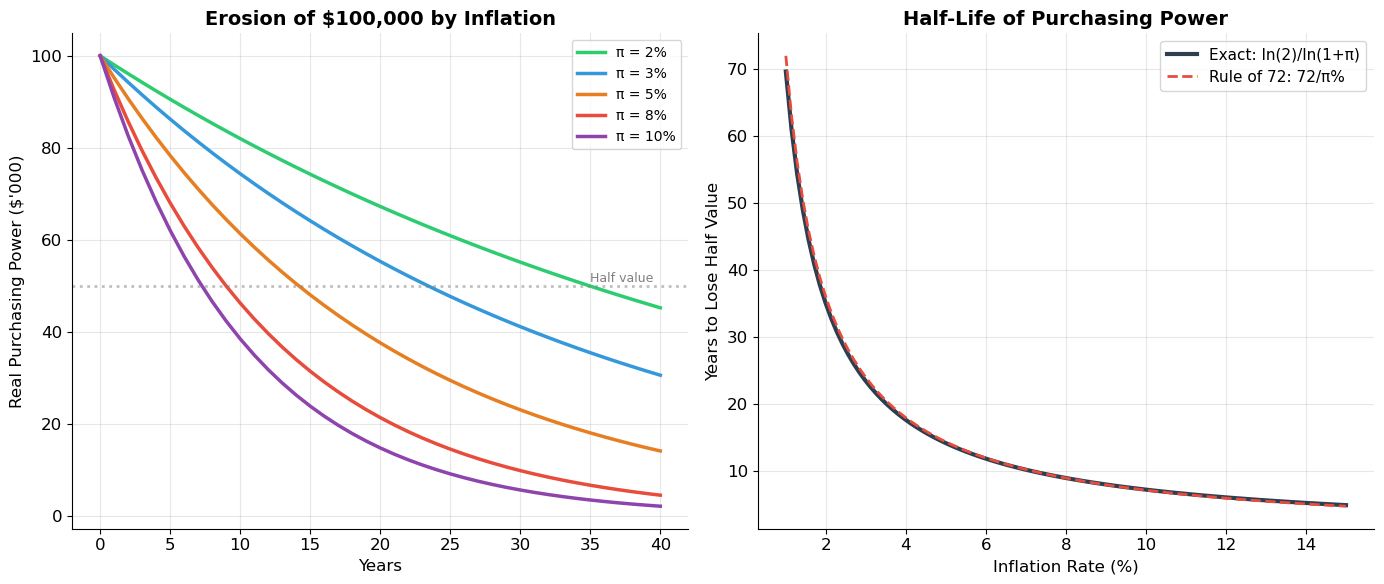

Years for $100,000 to lose half its purchasing power:
  π = 2%: 35.0 years
  π = 3%: 23.4 years
  π = 5%: 14.2 years
  π = 8%: 9.0 years
  π = 10%: 7.3 years


In [17]:
# ============================================================
# Purchasing Power Erosion Over Time
# ============================================================
# ▶ MODIFY AND RE-RUN
initial_wealth = 100_000
inflation_rates = [0.02, 0.03, 0.05, 0.08, 0.10]
horizon = 40
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
years = np.arange(0, horizon + 1)
colors = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c', '#8e44ad']

# Left: Real value of $100,000 over time
for pi, color in zip(inflation_rates, colors):
    real_value = initial_wealth / (1 + pi) ** years
    ax1.plot(years, real_value / 1000, color=color, linewidth=2.5, label=f'π = {pi:.0%}')

ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel("Real Purchasing Power ($'000)", fontsize=12)
ax1.set_title(f'Erosion of ${initial_wealth:,.0f} by Inflation', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.axhline(y=initial_wealth / 2 / 1000, color='gray', linestyle=':', alpha=0.5)
ax1.text(35, initial_wealth / 2 / 1000 + 1, 'Half value', fontsize=9, color='gray')

# Right: Inflation-adjusted "Rule of 72" — when does money lose half its value?
pi_range = np.linspace(0.01, 0.15, 100)
half_life = np.log(2) / np.log(1 + pi_range)
rule72 = 72 / (pi_range * 100)

ax2.plot(pi_range * 100, half_life, color='#2c3e50', linewidth=3, label='Exact: ln(2)/ln(1+π)')
ax2.plot(pi_range * 100, rule72, color='#e74c3c', linewidth=2, linestyle='--', label='Rule of 72: 72/π%')
ax2.set_xlabel('Inflation Rate (%)', fontsize=12)
ax2.set_ylabel('Years to Lose Half Value', fontsize=12)
ax2.set_title("Half-Life of Purchasing Power", fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("Years for $100,000 to lose half its purchasing power:")
for pi in inflation_rates:
    hl = np.log(2) / np.log(1 + pi)
    print(f"  π = {pi:.0%}: {hl:.1f} years")

In [18]:
# ============================================================
# NPV Consistency: Real vs. Nominal (Must Match!)
# ============================================================
# Lo's example from the slides (slide 33)
salary_now = 100_000
real_growth = 0.02
nominal_rate = 0.05
inflation = 0.02
T = 20

# Derived rates
real_rate = (1 + nominal_rate) / (1 + inflation) - 1
nominal_growth = (1 + real_growth) * (1 + inflation) - 1

# Build year-by-year comparison
print("=" * 85)
print("NPV CONSISTENCY CHECK: Real vs. Nominal Cash Flows")
print("=" * 85)
print(f"{'Year':>5s} {'Nominal CF':>14s} {'÷(1+r_nom)^t':>14s} {'PV (nominal)':>14s} │ {'Real CF':>14s} {'÷(1+r_real)^t':>14s} {'PV (real)':>14s}")
print("-" * 85)

pv_nom_total = 0
pv_real_total = 0

for t in range(1, min(T + 1, 8)):  # Show first 7 years
    nom_cf = salary_now * (1 + nominal_growth) ** t
    real_cf = salary_now * (1 + real_growth) ** t
    pv_n = nom_cf / (1 + nominal_rate) ** t
    pv_r = real_cf / (1 + real_rate) ** t
    pv_nom_total += pv_n
    pv_real_total += pv_r
    print(f"{t:>5d} {nom_cf:>14,.0f} {1/(1+nominal_rate)**t:>14.6f} {pv_n:>14,.0f} │ {real_cf:>14,.0f} {1/(1+real_rate)**t:>14.6f} {pv_r:>14,.0f}")

print(f"{'...':>5s}")

# Complete calculation
pv_nom_full = pv_growing_annuity(salary_now * (1 + nominal_growth), nominal_rate, nominal_growth, T)
pv_real_full = pv_growing_annuity(salary_now * (1 + real_growth), real_rate, real_growth, T)

print("-" * 85)
print(f"{'TOTAL':>5s} {'':>14s} {'':>14s} {pv_nom_full:>14,.0f} │ {'':>14s} {'':>14s} {pv_real_full:>14,.0f}")
print(f"\n✅ Both methods yield the same PV: ${pv_nom_full:,.0f} ≈ ${pv_real_full:,.0f}")
print(f"   (Tiny difference of ${abs(pv_nom_full - pv_real_full):,.2f} is due to floating-point arithmetic)")

NPV CONSISTENCY CHECK: Real vs. Nominal Cash Flows
 Year     Nominal CF   ÷(1+r_nom)^t   PV (nominal) │        Real CF  ÷(1+r_real)^t      PV (real)
-------------------------------------------------------------------------------------
    1        104,040       0.952381         99,086 │        102,000       0.971429         99,086
    2        108,243       0.907029         98,180 │        104,040       0.943673         98,180
    3        112,616       0.863838         97,282 │        106,121       0.916711         97,282
    4        117,166       0.822702         96,393 │        108,243       0.890520         96,393
    5        121,899       0.783526         95,511 │        110,408       0.865076         95,511
    6        126,824       0.746215         94,638 │        112,616       0.840360         94,638
    7        131,948       0.710681         93,773 │        114,869       0.816349         93,773
  ...
-------------------------------------------------------------------------

---

<a id='5-extensions'></a>
## 5. Extensions and Qualifications

Lo closes the PV Relations block by flagging several important extensions that will be developed throughout the course:

### 5.1 Taxes

In reality, cash flows are subject to taxation. After-tax cash flows are what matter for valuation:

$$CF_{\text{after-tax}} = CF_{\text{before-tax}} \times (1 - \tau)$$

Interest income and capital gains may be taxed at different rates. Tax shields on debt interest are a key factor in corporate finance (Lectures 17–18).

### 5.2 Multiple Currencies

When cash flows are in different currencies, the analyst must either:
- Convert all cash flows to one currency using forward exchange rates, then discount with that currency's rate, or
- Discount in each local currency using local rates, then convert at the spot rate

### 5.3 Term Structure of Interest Rates

So far we've assumed a flat discount rate $r$ for all maturities. In reality, rates vary by maturity — the **yield curve**. Different cash flows at different horizons should, in principle, be discounted at different rates:

$$PV = \frac{CF_1}{1+r_1} + \frac{CF_2}{(1+r_2)^2} + \cdots + \frac{CF_T}{(1+r_T)^T}$$

This is the subject of **Fixed-Income Securities** (Sessions 4–7).

### 5.4 Choosing the Right Discount Rate

The most critical and difficult part of any NPV calculation. The discount rate should reflect the **opportunity cost of capital** — the expected return on investments of similar risk in financial markets. We develop this rigorously with the **CAPM** in Lectures 15–17.

### 5.5 Forecasting Cash Flows

NPV is only as good as the cash flow forecasts. In practice, scenario analysis, sensitivity analysis, and Monte Carlo simulation are used to handle uncertainty in cash flow estimates.

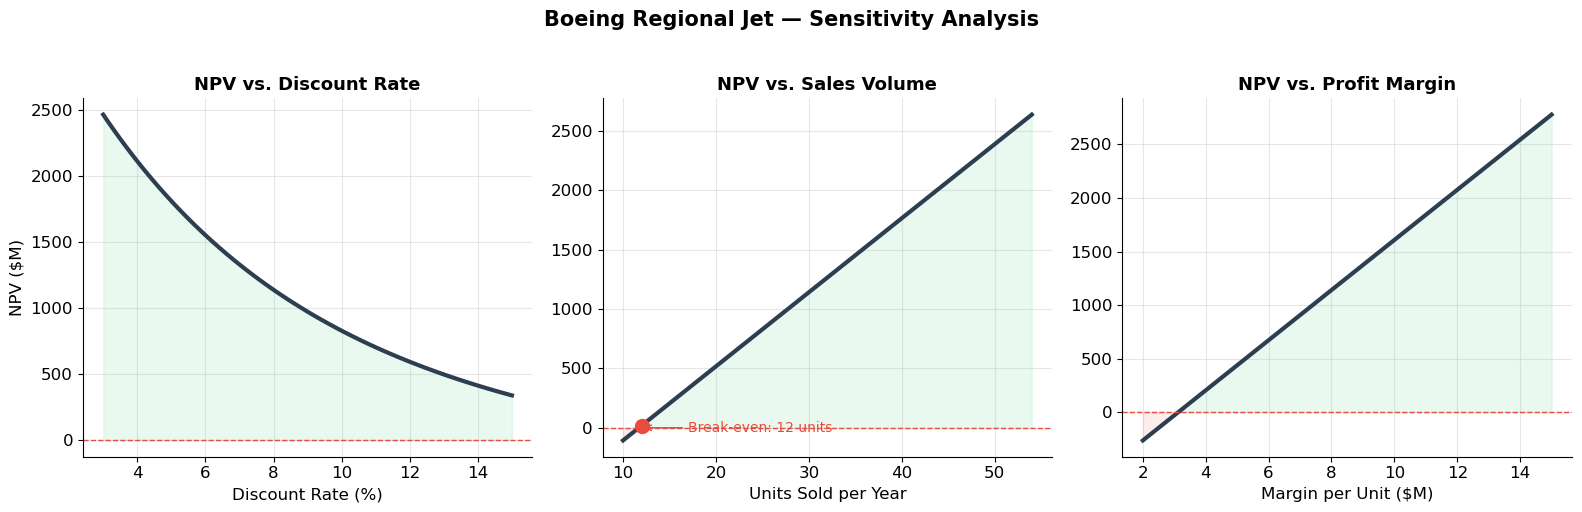

In [20]:
# ============================================================
# Sensitivity Analysis: How Assumptions Drive NPV
# ============================================================
# Using the Boeing example — how sensitive is NPV to key assumptions?

base_r = 0.08
base_units = 30
base_margin = 8  # $M per plane

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Sensitivity to discount rate
rates = np.linspace(0.03, 0.15, 100)
npvs_r = []
for r in rates:
    cfs = [0] + [-850/3]*3 + [base_units * base_margin]*20
    npvs_r.append(compute_npv(cfs, r))
axes[0].plot(rates * 100, npvs_r, color='#2c3e50', linewidth=3)
axes[0].axhline(y=0, color='#e74c3c', linewidth=1, linestyle='--')
axes[0].set_xlabel('Discount Rate (%)')
axes[0].set_ylabel('NPV ($M)')
axes[0].set_title('NPV vs. Discount Rate', fontsize=13, fontweight='bold')
axes[0].fill_between(rates*100, npvs_r, 0, where=np.array(npvs_r)>0, alpha=0.1, color='#2ecc71')
axes[0].fill_between(rates*100, npvs_r, 0, where=np.array(npvs_r)<0, alpha=0.1, color='#e74c3c')

# 2. Sensitivity to units sold
units_range = np.arange(10, 55, 1)
npvs_u = []
for u in units_range:
    cfs = [0] + [-850/3]*3 + [u * base_margin]*20
    npvs_u.append(compute_npv(cfs, base_r))
axes[1].plot(units_range, npvs_u, color='#2c3e50', linewidth=3)
axes[1].axhline(y=0, color='#e74c3c', linewidth=1, linestyle='--')
axes[1].set_xlabel('Units Sold per Year')
axes[1].set_title('NPV vs. Sales Volume', fontsize=13, fontweight='bold')
axes[1].fill_between(units_range, npvs_u, 0, where=np.array(npvs_u)>0, alpha=0.1, color='#2ecc71')
axes[1].fill_between(units_range, npvs_u, 0, where=np.array(npvs_u)<0, alpha=0.1, color='#e74c3c')

# Break-even units
be_idx = np.argmin(np.abs(npvs_u))
axes[1].plot(units_range[be_idx], npvs_u[be_idx], 'o', color='#e74c3c', markersize=10, zorder=5)
axes[1].annotate(f'Break-even: {units_range[be_idx]} units', xy=(units_range[be_idx], 0),
                xytext=(units_range[be_idx]+5, min(npvs_u)*0.3), fontsize=10, color='#e74c3c',
                arrowprops=dict(arrowstyle='->', color='#e74c3c'))

# 3. Sensitivity to margin per unit
margins = np.linspace(2, 15, 100)
npvs_m = []
for m in margins:
    cfs = [0] + [-850/3]*3 + [base_units * m]*20
    npvs_m.append(compute_npv(cfs, base_r))
axes[2].plot(margins, npvs_m, color='#2c3e50', linewidth=3)
axes[2].axhline(y=0, color='#e74c3c', linewidth=1, linestyle='--')
axes[2].set_xlabel('Margin per Unit ($M)')
axes[2].set_title('NPV vs. Profit Margin', fontsize=13, fontweight='bold')
axes[2].fill_between(margins, npvs_m, 0, where=np.array(npvs_m)>0, alpha=0.1, color='#2ecc71')
axes[2].fill_between(margins, npvs_m, 0, where=np.array(npvs_m)<0, alpha=0.1, color='#e74c3c')

fig.suptitle('Boeing Regional Jet — Sensitivity Analysis', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

<a id='6-exercises'></a>
## 6. Exercises

### Exercise 1: Growing Annuity — Retirement Planning

You are 30 years old and earn \$80,000 per year. You expect your salary to grow at 3% per year in real terms. You plan to retire at age 65 (35 years of work). The real interest rate is 4%.

**(a)** What is the present value of your lifetime earnings (as a growing annuity)?

**(b)** You want to save a fixed fraction $s$ of your salary each year. After retirement, you plan to spend \$60,000 per year (in today's dollars) for 30 years. What saving rate $s$ do you need?

**(c)** How does the answer change if your salary grows at only 1% in real terms? What about 5%?

In [22]:
# Exercise 1 — Workspace
# salary = 80_000
# real_growth = 0.03
# real_rate = 0.04
# work_years = 35

# (a)
# pv_earnings = pv_growing_annuity(salary * (1 + real_growth), real_rate, real_growth, work_years)
# print(f"PV of lifetime earnings: ${pv_earnings:,.0f}")

# (b) Need FV of savings = PV of retirement spending
# pv_retirement = pv_annuity(60_000, real_rate, 30)
# # FV of savings at retirement (need to find s)
# # Each year save s * salary * (1+g)^t, compound to year 35
# # This is a growing annuity future value problem

### Exercise 2: Leverage and Risk

**(a)** You buy a \$300,000 apartment with 10% down (30,000 equity, 270,000 mortgage). What is your leverage ratio? If the apartment appreciates 15%, what is your return on equity? If it drops 8%, what happens?

**(b)** A hedge fund has \$500 million in equity and uses 8:1 leverage (total assets = \$4 billion). The portfolio returns 12% in a good year and −6% in a bad year. Calculate the return on equity in each scenario. What asset decline would wipe out the fund?

**(c)** Compare Lehman's 31:1 leverage on real estate assets to Lo's 20:1 leverage on his house. Use the historical volatility of residential housing (~3% annual) vs. commercial real estate (~10–15% annual) to argue why one was reasonable and the other was not.

In [24]:
# Exercise 2 — Workspace
# (a)
# equity, total = 30_000, 300_000
# leverage = total / equity
# print(f"Leverage: {leverage:.0f}:1")
# for asset_return in [0.15, -0.08, -1/leverage]:
#     equity_return = leverage * asset_return
#     new_equity = equity * (1 + equity_return)
#     print(f"Asset return {asset_return:+.0%}: Equity return = {equity_return:+.0%}, New equity = ${new_equity:,.0f}")

# (b)
# equity_hf = 500  # $M
# leverage_hf = 8
# assets_hf = equity_hf * leverage_hf
# for r_a in [0.12, -0.06]:
#     r_e = leverage_hf * r_a
#     print(f"Asset return {r_a:+.0%} → Equity return {r_e:+.0%} (${equity_hf * r_e:+,.0f}M)")
# wipeout = 1 / leverage_hf
# print(f"Wipeout threshold: {wipeout:.1%} asset decline")

### Exercise 3: Inflation and Real Returns

**(a)** A government bond yields 6% nominally. Inflation is 2.5%. Calculate the exact and approximate real returns. Over 20 years, what is the real value of \$10,000 invested in this bond?

**(b)** A country has 25% inflation. A local bond yields 30% nominally. What is the real return? Show that the approximation $r_{\text{real}} \approx r_{\text{nom}} - \pi$ gives a very misleading answer at high inflation.

**(c)** You are comparing two investments: (i) a US bond yielding 4% with 2% US inflation, and (ii) a Brazilian bond yielding 12% with 8% Brazilian inflation. Which offers the higher *real* return? What additional risk factors should you consider?

In [26]:
# Exercise 3 — Workspace
# (a)
# r_nom, pi = 0.06, 0.025
# r_real_exact = (1 + r_nom) / (1 + pi) - 1
# r_real_approx = r_nom - pi
# real_fv = 10_000 * (1 + r_real_exact)**20
# print(f"Exact real return: {r_real_exact:.4%}")
# print(f"Approximate:       {r_real_approx:.4%}")
# print(f"Real FV after 20 years: ${real_fv:,.2f}")

# (b)
# r_nom_b, pi_b = 0.30, 0.25
# r_real_b = (1 + r_nom_b) / (1 + pi_b) - 1
# r_approx_b = r_nom_b - pi_b
# print(f"Exact real return:       {r_real_b:.4%}")
# print(f"Approximate (WRONG!):    {r_approx_b:.4%}")
# print(f"Approximation error:     {(r_approx_b - r_real_b)*100:.2f} percentage points")

---

## Key Takeaways — Sessions 2 & 3

1. **Assets are cash flow sequences.** Valuation = discounting all cash flows to a common date.

2. **Four special cash flows** — perpetuity, growing perpetuity, annuity, growing annuity — cover most valuation problems in practice.

3. **Leverage amplifies** both gains and losses. With leverage ratio $L$, the maximum tolerable asset decline is $1/L$. Lehman's ~31:1 leverage meant a 3.3% asset decline would destroy all equity.

4. **Real vs. Nominal consistency** is essential: discount real cash flows at real rates, nominal cash flows at nominal rates. Never mix them.

5. **The Fisher equation** links nominal and real rates: $r_{\text{real}} = (1+r_{\text{nom}})/(1+\pi) - 1$.

---

## References

- **Brealey, R.A., Myers, S.C., and Allen, F.** *Principles of Corporate Finance*, Chapters 2–3.
- **MIT OCW 15.401:** [Present Value Relations](https://ocw.mit.edu/courses/15-401-finance-theory-i-fall-2008/pages/video-lectures-and-slides/present-value-relations/)
- **Lehman Brothers Holdings Inc.** 10-K (2007), 10-Q (Q2 2008). SEC EDGAR.
- **Fisher, I.** (1930). *The Theory of Interest*. New York: Macmillan.

---

*Next: **Session 4 — Fixed-Income Securities I** — bond pricing, yield to maturity, the term structure of interest rates, and duration.*